In [1]:
pip install fredapi

In [2]:
pip install matplotlib

[*********************100%%**********************]  1 of 1 completed


Summary statistics of the Treasury yield data:
             Open        High         Low       Close   Adj Close  Volume
count  756.000000  756.000000  756.000000  756.000000  756.000000   756.0
mean     1.754353    1.786126    1.725241    1.757529    1.757529     0.0
std      0.993517    1.003851    0.984509    0.994720    0.994720     0.0
min      0.484000    0.538000    0.398000    0.499000    0.499000     0.0
25%      0.925750    0.945000    0.901000    0.925250    0.925250     0.0
50%      1.538000    1.566000    1.512000    1.535000    1.535000     0.0
75%      2.419000    2.484750    2.373250    2.428250    2.428250     0.0
max      4.331000    4.333000    4.200000    4.234000    4.234000     0.0


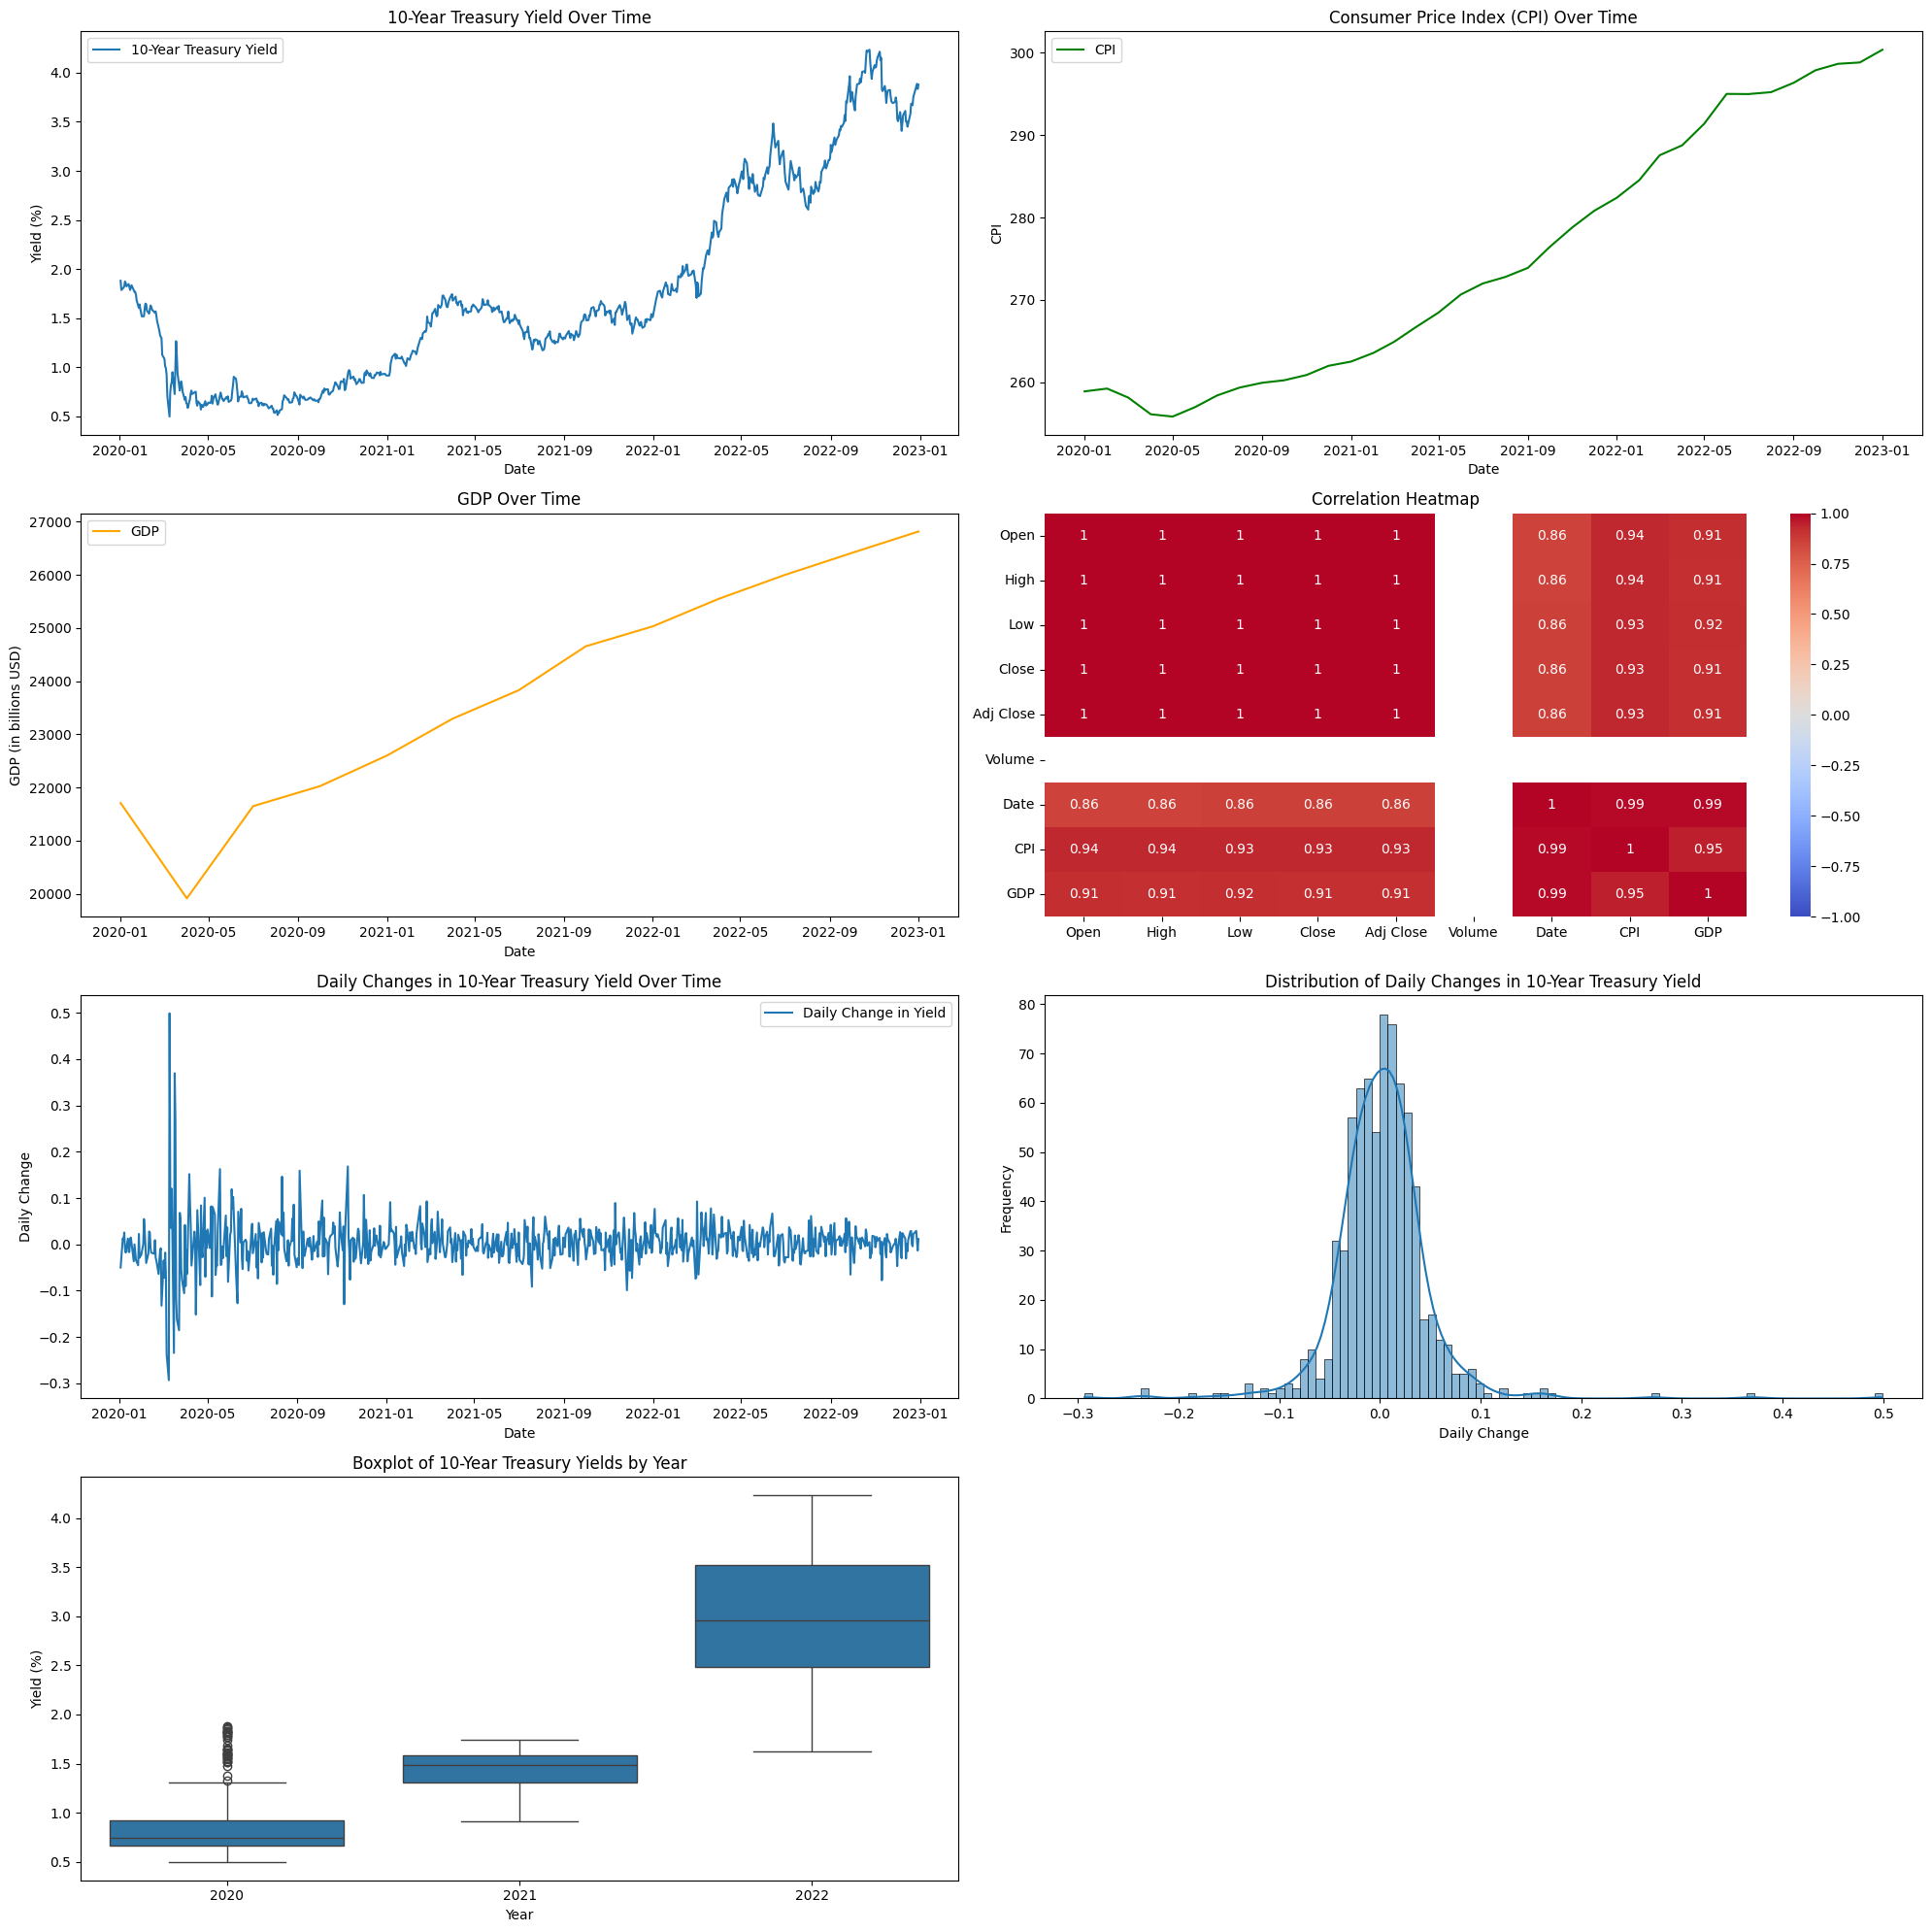

In [4]:

!pip install yfinance
!pip install fredapi
!pip install seaborn

from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

# API key
fred = Fred(api_key='fcff9247972ea0909316db0bd50f38c2')

# Symbol for the U.S. Treasury bond (10-year yield)
symbol = '^TNX'  # 10-year Treasury Note Yield Index

# Fetch historical data for the Treasury bond yield
treasury_yield_data = yf.download(symbol, start="2020-01-01", end="2023-01-01")

# Fetch some economic data from FRED CPI, GDP
cpi_data = fred.get_series('CPIAUCSL', observation_start='2020-01-01', observation_end='2023-01-01')
gdp_data = fred.get_series('GDP', observation_start='2020-01-01', observation_end='2023-01-01')

# Convert FRED data to DataFrames
cpi_df = cpi_data.to_frame().reset_index()
cpi_df.columns = ['Date', 'CPI']
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])

gdp_df = gdp_data.to_frame().reset_index()
gdp_df.columns = ['Date', 'GDP']
gdp_df['Date'] = pd.to_datetime(gdp_df['Date'])

# Merge Treasury yield data with CPI and GDP data on Date
merged_data = pd.merge(treasury_yield_data, cpi_df, left_index=True, right_on='Date', how='left')
merged_data = pd.merge(merged_data, gdp_df, on='Date', how='left')

# Set up the figure and axes for a grid of plots
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

# 1. Summary statistics
print("Summary statistics of the Treasury yield data:")
print(treasury_yield_data.describe())

# 2. Plot Treasury yield over time
axs[0, 0].plot(treasury_yield_data['Close'], label='10-Year Treasury Yield')
axs[0, 0].set_title('10-Year Treasury Yield Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Yield (%)')
axs[0, 0].legend()

# 3. Plot CPI over time
axs[0, 1].plot(cpi_df['Date'], cpi_df['CPI'], label='CPI', color='green')
axs[0, 1].set_title('Consumer Price Index (CPI) Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('CPI')
axs[0, 1].legend()

# 4. Plot GDP over time
axs[1, 0].plot(gdp_df['Date'], gdp_df['GDP'], label='GDP', color='orange')
axs[1, 0].set_title('GDP Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('GDP (in billions USD)')
axs[1, 0].legend()

# 5. Correlation heatmap
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Heatmap')

# 6. Daily changes in yield
treasury_yield_data['Daily Change'] = treasury_yield_data['Close'].pct_change()
axs[2, 0].plot(treasury_yield_data['Daily Change'], label='Daily Change in Yield')
axs[2, 0].set_title('Daily Changes in 10-Year Treasury Yield Over Time')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Daily Change')
axs[2, 0].legend()

# 7. Distribution of daily changes in yield
sns.histplot(treasury_yield_data['Daily Change'].dropna(), bins=100, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Distribution of Daily Changes in 10-Year Treasury Yield')
axs[2, 1].set_xlabel('Daily Change')
axs[2, 1].set_ylabel('Frequency')

# 8. Boxplot of Treasury yields by year
treasury_yield_data['Year'] = treasury_yield_data.index.year
sns.boxplot(x='Year', y='Close', data=treasury_yield_data, ax=axs[3, 0])
axs[3, 0].set_title('Boxplot of 10-Year Treasury Yields by Year')
axs[3, 0].set_xlabel('Year')
axs[3, 0].set_ylabel('Yield (%)')

# Hide the empty subplot
axs[3, 1].axis('off')

plt.tight_layout()
plt.show()


**Scenario** **5**
10-Year Treasury Yield Over Time: A line chart showing the historical yields of the 10-Year Treasury Note from 2020 to 2023. It displays the trend and fluctuations in the yield over time, indicating periods of rising or falling interest rates. This helps in understanding the bond market's reaction to economic events.

Consumer Price Index (CPI) Over Time: A line chart illustrating the CPI from 2020 to 2023. It shows the trend in inflation over time. A rising CPI indicates increasing inflation, which can affect bond yields and prices.

GDP Over Time: A line chart showing the GDP data from 2020 to 2023. It illustrates the overall economic growth or contraction. Significant changes in GDP can influence bond yields as they reflect economic health.

Correlation Heatmap: A heatmap displaying the correlation coefficients between various variables, including stock data (Open, High, Low, Close, Adj Close, Volume) and economic indicators (Date, CPI, GDP). Darker colors indicate stronger correlations. For instance, the high correlation between CPI and GDP suggests a relationship between inflation and economic output. The correlation between bond yields and other variables helps understand their interdependencies.

Daily Changes in 10-Year Treasury Yield Over Time: A line chart representing the daily percentage changes in the 10-Year Treasury yield. It highlights the volatility of the bond yield on a daily basis. Spikes in the chart indicate days with significant changes, which can be analyzed to understand market reactions to specific events.

Distribution of Daily Changes in 10-Year Treasury Yield: A histogram showing the frequency distribution of daily yield changes.It provides a view of how yield changes are distributed, showing the most common changes and the presence of any extreme values or outliers. This helps in understanding the typical volatility and risk associated with the bond.

Boxplot of 10-Year Treasury Yields by Year: A boxplot illustrating the distribution of 10-Year Treasury yields for each year from 2020 to 2023. It displays the median, quartiles, and outliers for each year, showing the variability and range of yields over time. This helps identify trends and periods of stability or volatility in the bond market.

[*********************100%%**********************]  1 of 1 completed


Summary statistics of the stock data:
              Open         High          Low        Close    Adj Close  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     22.063151    22.957707    21.061223    21.946997    21.946997   
std      20.791614    21.468384    19.964695    20.610855    20.610855   
min       1.320000     1.430000     1.250000     1.310000     1.310000   
25%       6.150000     6.512500     5.735000     6.150000     6.150000   
50%      16.000000    17.000000    15.000000    15.750000    15.750000   
75%      30.672501    32.000000    29.450001    30.709999    30.709999   
max      97.000000   100.000000    92.500000    95.000000    95.000000   

             Volume  
count  2.518000e+03  
mean   1.276536e+06  
std    4.479487e+06  
min    0.000000e+00  
25%    5.760000e+02  
50%    6.468000e+03  
75%    8.500000e+05  
max    7.860700e+07  


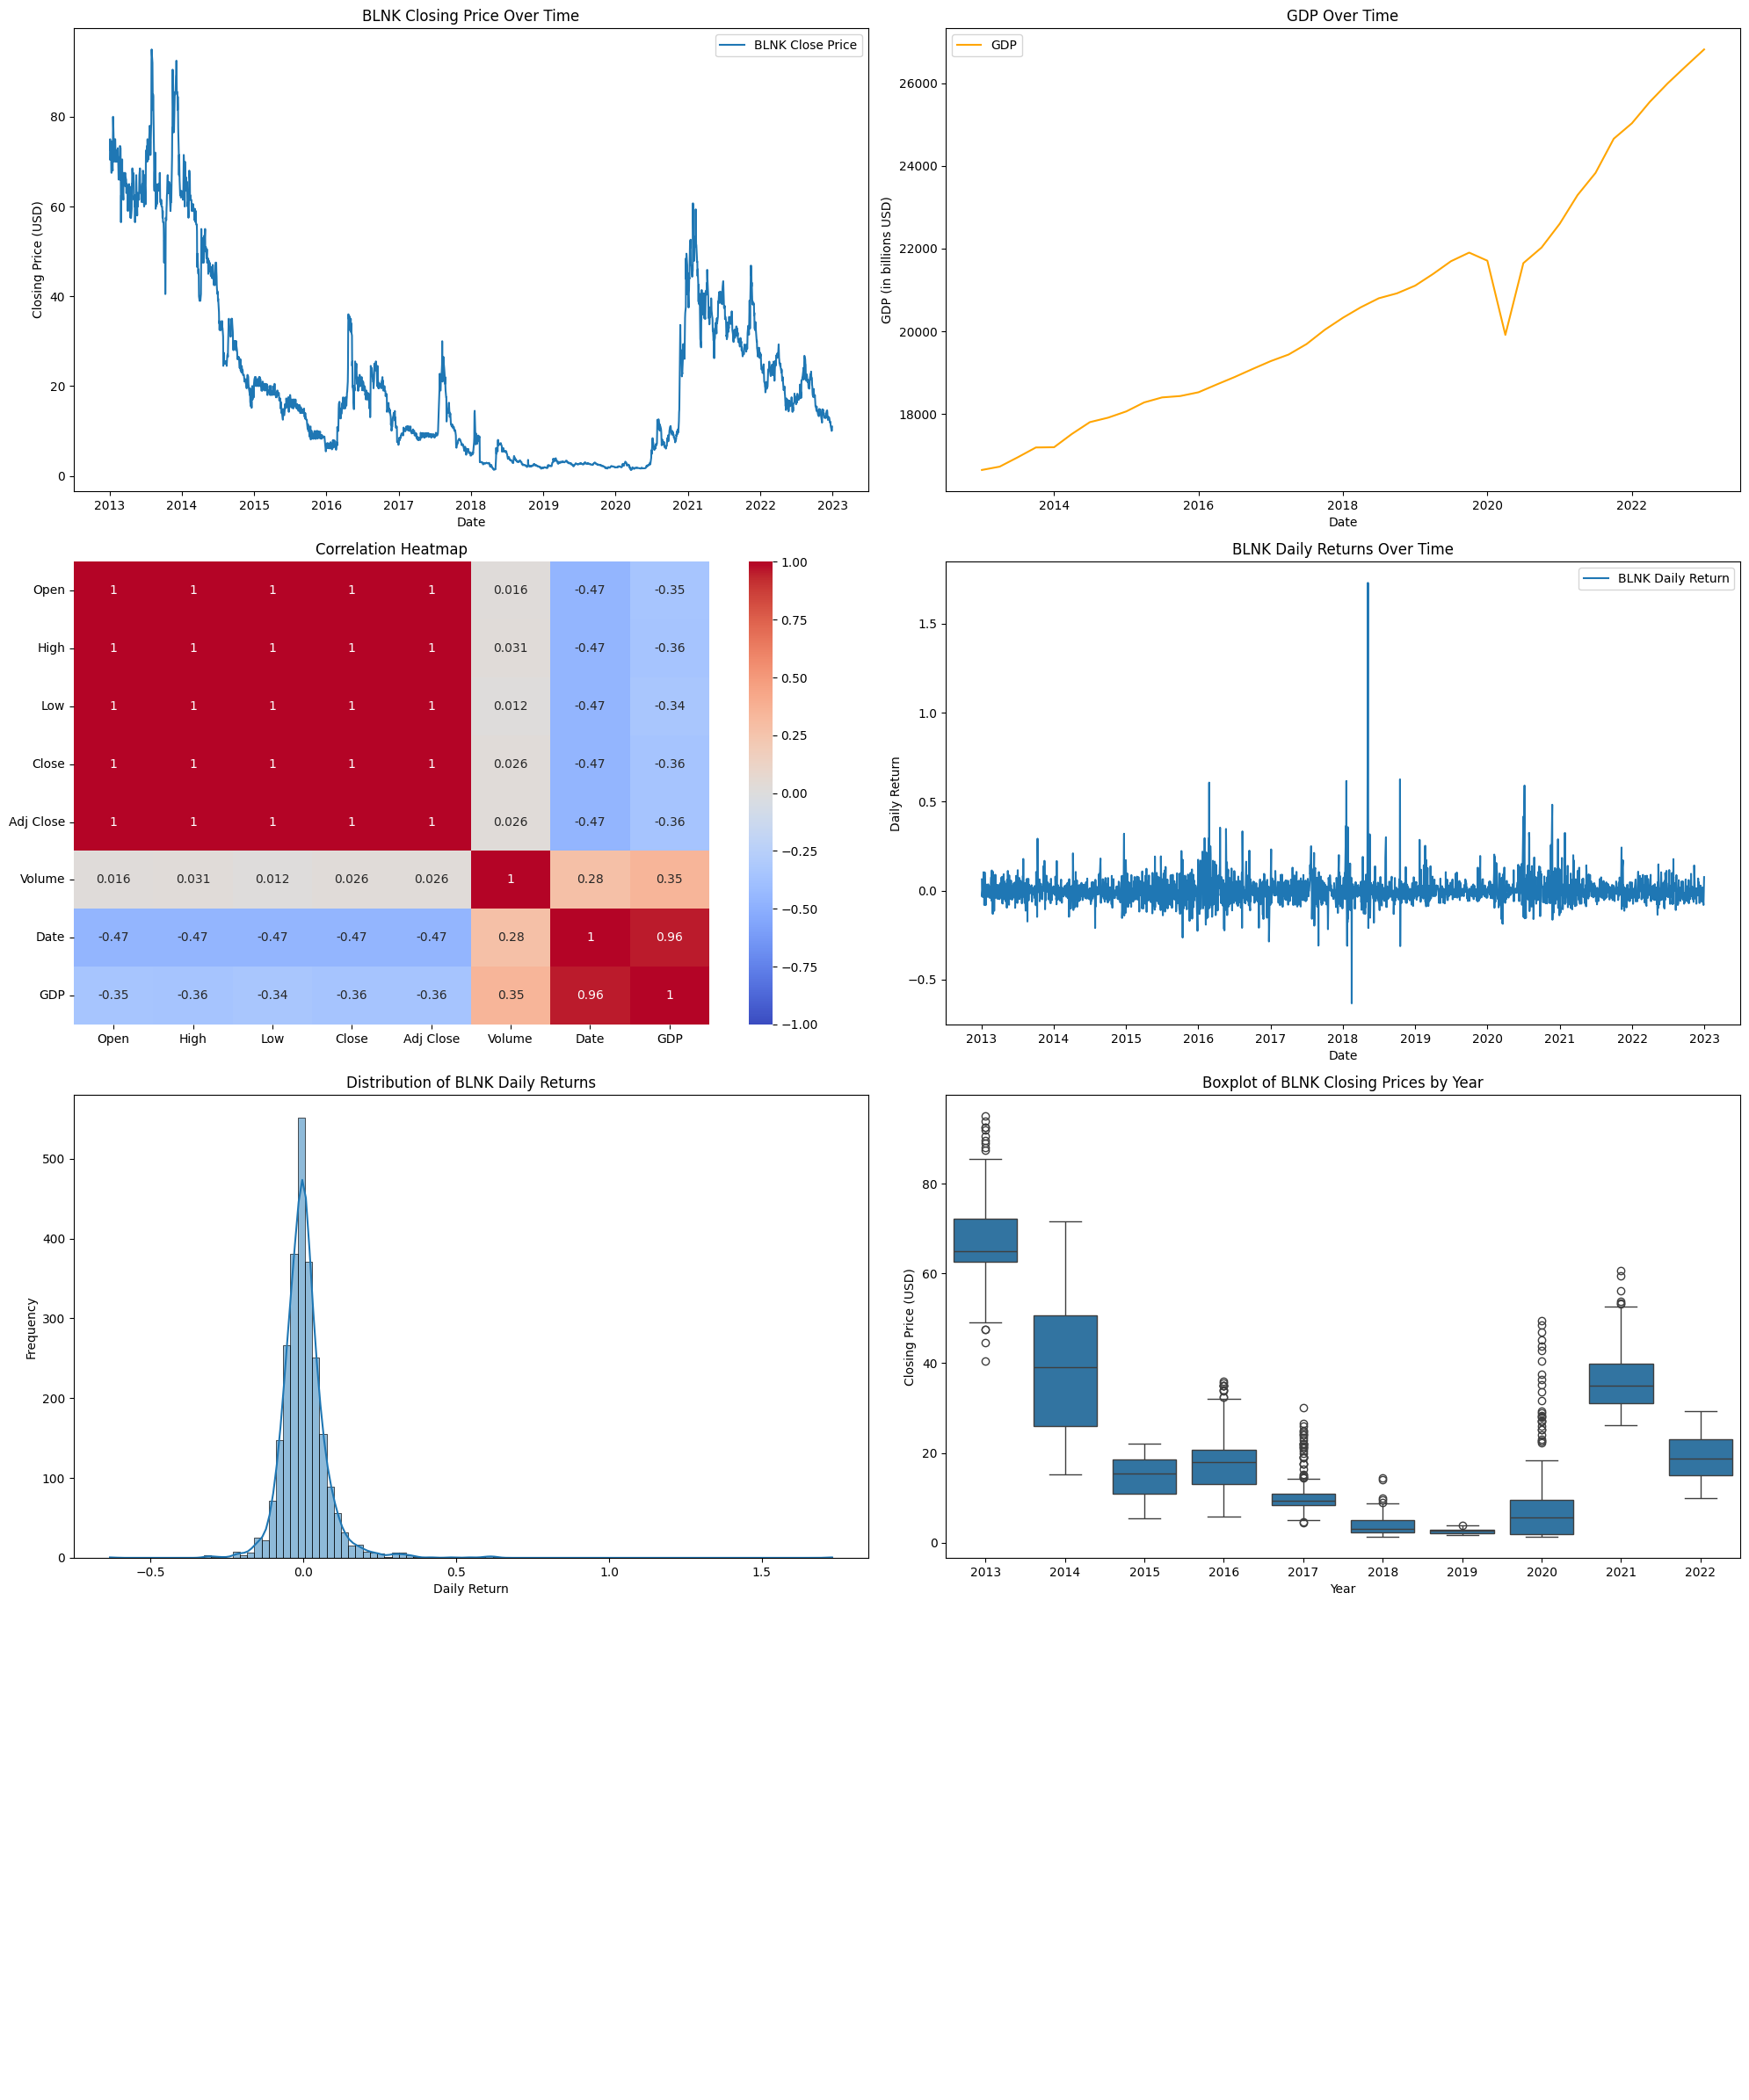

In [7]:

from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

# API key
fred = Fred(api_key='fcff9247972ea0909316db0bd50f38c2')

# Symbol for the microcap stock
symbol = 'BLNK'

# Fetch historical data for the stock
stock_data = yf.download(symbol, start="2013-01-01", end="2023-01-01")

# Fetch economic data from FRED ; GDP
gdp_data = fred.get_series('GDP', observation_start='2013-01-01', observation_end='2023-01-01')

# Convert FRED data to a DataFrame
gdp_df = gdp_data.to_frame().reset_index()
gdp_df.columns = ['Date', 'GDP']
gdp_df['Date'] = pd.to_datetime(gdp_df['Date'])

# Merge stock data and GDP data on Date
merged_data = pd.merge(stock_data, gdp_df, left_index=True, right_on='Date', how='left')

# Exploratory Data Analysis (EDA)
# 1. Summary statistics
print("Summary statistics of the stock data:")
print(stock_data.describe())

# Set up the figure and axes for a grid of plots
fig, axs = plt.subplots(4, 2, figsize=(20, 24))

# 2. Plot closing price over time
axs[0, 0].plot(stock_data['Close'], label='BLNK Close Price')
axs[0, 0].set_title('BLNK Closing Price Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Closing Price (USD)')
axs[0, 0].legend()

# 3. Plot GDP over time
axs[0, 1].plot(gdp_df['Date'], gdp_df['GDP'], label='GDP', color='orange')
axs[0, 1].set_title('GDP Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('GDP (in billions USD)')
axs[0, 1].legend()

# 4. Correlation heatmap
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 0])
axs[1, 0].set_title('Correlation Heatmap')

# 5. Daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()
axs[1, 1].plot(stock_data['Daily Return'], label='BLNK Daily Return')
axs[1, 1].set_title('BLNK Daily Returns Over Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Daily Return')
axs[1, 1].legend()

# 6. Distribution of daily returns
sns.histplot(stock_data['Daily Return'].dropna(), bins=100, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribution of BLNK Daily Returns')
axs[2, 0].set_xlabel('Daily Return')
axs[2, 0].set_ylabel('Frequency')

# 7. Boxplot of closing prices by year
stock_data['Year'] = stock_data.index.year
sns.boxplot(x='Year', y='Close', data=stock_data, ax=axs[2, 1])
axs[2, 1].set_title('Boxplot of BLNK Closing Prices by Year')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Closing Price (USD)')

# Hide the empty subplots
axs[3, 0].axis('off')
axs[3, 1].axis('off')

plt.tight_layout()
plt.show()


**Scenario 6**

BLNK Closing Price Over Time:
 This line chart shows the historical closing prices of BLNK stock from 2013 to 2023. It reveals trends, such as periods of increase or decrease in stock price, and highlights significant price movements and volatility over the years.

GDP Over Time:
 This line chart displaying GDP data from 2013 to 2023. It shows the general trend of economic growth or contraction. Notable dips or peaks in GDP can be correlated with significant events impacting the economy.

Correlation Heatmap: we have a heatmap showing the correlation coefficients between various variables in the dataset.

Variables: Includes stock-related data (Open, High, Low, Close, Adj Close, Volume) and economic indicators (Date, GDP).
Insights: Darker colors indicate stronger correlations. For example, the correlation between GDP and stock variables can reveal how the stock's performance is related to economic conditions.

BLNK Daily Returns Over Time: A line chart depicting the daily percentage returns of BLNK stock. it provide insights on the volatility of the stock on a day-to-day basis. Spikes and drops in the chart indicate days with significant gains or losses.

Distribution of BLNK Daily Returns: A histogram showing the frequency distribution of daily returns for BLNK stock. It provides a view of how returns are spread out over different values, showing the most common daily returns and the presence of any extreme values or outliers.

Boxplot of BLNK Closing Prices by Year: A boxplot illustrating the distribution of BLNK's closing prices for each year from 2013 to 2023.
It displays the median (middle line), quartiles (box edges), and outliers (dots). This helps in understanding the variability and range of stock prices each year, highlighting periods of stability or volatility.